![](Images/global-communications-company-header-image.jpg)
# **Customer Retention Analytic: Telco Customer Churn**
#### Created By : Reyhan Alif Pradityo

This is a machine learning project intended as a requirement for Capstone Project Module 3 in Purwadhika Data Science course. The outcome of this project is to demonstrate student ability to create a machine learning model, but not only to create, but the student need to have a clear understanding about the problem, the targets needed to achieve, limitation of the model, and finally giving the correct conclusion and recommendation.  

---

## Business Problem Understanding

**Context**

In this project, we work as a Data Scientist in an X Telco Company. X Telco Company provides home phone and internet services. The most crucial thing in telecom industry is to retain existing customer. Due to telecom industry competition, it is easy for the customers to choose from variety provider and switch from to another provider. Because of that, the telecommunications business usually has an annual churn rate of 15-25% [[1]](https://www.smartlook.com/blog/customer-churn-retention/).

The problem that company face to retain individual customer is due to large number of customer, Costumer Solution Division don't have enough resource and time to handle each of the customer. The cost would be too great if they have to deal with every single customer and convince them to keep using the company products. 

To deal with that problem, we need to predict which customer that has high churn potentional, so we could spend our precious resource to deal with those specific customer.  

But why retaining current customer is so important? why don't the company just focus to attract more customer instead of spending resource to retain them? Because it is much less expensive to retain existing customers than it is to acquire new customers. That's why customer churn metric is really important in telecom industry [[2]](https://www.europeanbusinessreview.com/is-acquiring-new-customers-more-expensive-than-keeping-them/).

What we want to do next as a Data Scientist in X Telco Company is to create a Machine Learning Model to predict which customer that has high risk of churn in the next billing cycle. 

Target :

0 : Non-Churn Customer 

1 : Churn Customer

**Why We Should use ML in this Project**

Utilizing Machine Learning in Business is usually expensive and some problems maybe don't need machine learning model considering the profit it could generate to cover the cost of utilizing machine learning. 

*So why we need to use Machine Learning to solve the problem in this project?*

The volume of data we need to analyze from telco customer is big [[3]](https://www.elinext.com/industries/telecom/big-data-in-telecom/). We need to have the churn prediction ready every month and right after every billing cycle ends. So the possible way to achieve that is by utilizing Machine Learning. 

*Will the cost saved from retaining customer through this solution could cover the cost of utilizing Machine Learning?*

That's what we are going to find out in this project, right after we could determine our machine learning model, we will find out wether the cost saved could cover the cost or not.


**Goals**

The goal of this project is to create a Machine Learning model that could be used to predict Churn Customer in the next billing cycle. We will use Telco Customer Churn dataset from X Telco Company as a base to train the model. 

The Machine Learning will be used by `Costumer Solution Division` as a base to determine which customer they will focus to approach each month to prevent them churn in the next billing cycle. 

The Machine Learning model will be used every billing cycle ends (first date of each month). 

By utilizing Machine Learning model, we have a target to reduce the cost of telemarketing customer retaining

**Analytic Approach :**

For the machine learning model, we want to predict customer that has high risk of churn. In this case, we will use `Classification Model` to predict Churn Customer. 

**Evalution Metric**

![](Images/1.jpg)

- *Type 1 Error*: False Postive

This type of error means that the model wrongly predict customer as a churn but turns out the customer is loyal. 
It would lead to waste of promotional cost, time and resource.

- *Type 2 Error*: False Negative

This type of error means that the model failed to predict churn customer. It would lead to company failed to retain the customer and decreasing number of customer, ideally we want to prevent this to happen.

Because we want our classifier to predict individual churns correctly as often as possible, we will use `Recall` as our primary metric. The other reason we use `Recall` is because in this dataset negative class is the majority and our focus class is positive.

**Project Limitation**

Since X Telco Company is based on US, and the data we will use is customer data from there, the model that will be developed might not be suitable to be applicated in other region outside US due to different characteristic of the customer and promotional preferences.    

---

## Data Understanding

Dataset source : https://www.kaggle.com/datasets/blastchar/telco-customer-churn



### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| customerID | Text | Unique ID for customer |
| gender | Text | Whether the customer is a male or a female |
| SeniorCitizen | Int | Whether the customer is a senior citizen or not (1, 0) |
| Partner | Text | Whether the customer has a partner or not (Yes, No) |
| Dependents | Text | Whether the customer has dependents or not (Yes, No) |
| tenure | Text | Number of months the customer has stayed with the company |
| PhoneService | Text | Whether the customer has a phone service or not (Yes, No) |
| MultipleLine | Text | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService | Text | Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Text | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup | Text | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Text | Whether the customer has online backup or not (Yes, No, No internet service) |
| TechSupport | Text | Whether the customer has online backup or not (Yes, No, No internet service) |
| StreamingTV | Text | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Text | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | Text | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling | Text | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | Text | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | Float | The amount charged to the customer monthly |
| TotalCharges | Float | The total amount charged to the customer
| Churn | Text | Whether the customer churned or not (Yes or No)

In [4]:
# Library
import pandas as pd # Pandas Library 
import numpy as np # Numpy Library

# Visualization
import matplotlib.pyplot as plt # For Data Visualization
import seaborn as sns # For Data Visualization

# Feature Engineering
from sklearn.pipeline import Pipeline # to Create a Pipeline for Feature Engineering
from sklearn.impute import SimpleImputer # For Missing Value Handling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder # to Handle Catogorical Features
from sklearn.compose import ColumnTransformer # to Transform Features
import category_encoders as ce # to encode category features

# Model Selection
from sklearn.linear_model import LogisticRegression # Base Model for Logistic Regression
from sklearn.tree import DecisionTreeClassifier # Base Model for Decision Tree 
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV # Finding Best Hyperparameter with GridsearchCV
from sklearn.metrics import classification_report, confusion_matrix # to Display Classification Report and Confusion Matrix
from sklearn.neighbors import KNeighborsClassifier # Base Model for KNN
from sklearn.ensemble import RandomForestClassifier # Ensemble method using Random Forest
from xgboost import XGBClassifier # Ensemble method using XGBoost
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score # Evaluation Metric

# Imbalance Dataset
from imblearn.pipeline import Pipeline # to Create Pipeline for Imbalance Handling
from imblearn.over_sampling import RandomOverSampler, SMOTE # Random Over Sample as Imblance Handling method


# Ignore Warning
import warnings 
warnings.simplefilter("ignore")


In [5]:
# Load Dataset
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Show # of data and Data Type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


---

## Data Cleaning and Preprocessing

In this part, we will clean and preprocess our dataset so it will be ready to be use for our machine learning model. This process involves :

1. Handling Data Type
2. Handling missing value
3. Handling duplicates
4. Droping unnecessary features for machine learning
5. Handling outlier
6. Handling imbalance

### Handling Data Type

The first thing we need to do to clean our dataset is to make sure our data type is right. We already saw each data type information from data understanding before, but some features are not correctly assigned to correct data type. Here is the list of features that don't have correct data type and justification of which data type is the correct one.

- TotalCharges

    In the data set, the TotalCharges columns data type is 'object'. This is not the correct data type because this columns contains total amount charged to the customer and it is supposed to be float64 data 

In [7]:
# We cannot convert TotalCharges data type directly to float64 due to there are some data that contatins ' ' string, 
df=df[df['TotalCharges']!=' ']

In [8]:
# Change TotalCharges DataType
df['TotalCharges']=df['TotalCharges'].astype('float64')

In [9]:
# Show info again to see if the data type already changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Handling Missing Value

Before handling the missing value, we want to know which features has missing value and the proportion of the missing value for each feature. If there is no missing value in the feature, we will skip this handling process. 

In [10]:
# We can create a table to show missing value with function below

listItem = [] # Empty list to be filled 
for col in df.columns : # Iterate all of the columns
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]); # Add information to listItem table

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem) # Create dataframe about missing value information
dfDesc # Show dataframe about missing value information

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7032,"[1400-WIVLL, 5510-BOIUJ]"
1,gender,object,0,0.0,2,"[Male, Female]"
2,SeniorCitizen,int64,0,0.0,2,"[1, 0]"
3,Partner,object,0,0.0,2,"[Yes, No]"
4,Dependents,object,0,0.0,2,"[Yes, No]"
5,tenure,int64,0,0.0,72,"[72, 70]"
6,PhoneService,object,0,0.0,2,"[Yes, No]"
7,MultipleLines,object,0,0.0,3,"[No, Yes]"
8,InternetService,object,0,0.0,3,"[DSL, Fiber optic]"
9,OnlineSecurity,object,0,0.0,3,"[No internet service, No]"


As we can see from the table above, there is no missing value in all of the features, hence we can skip Missing Value Handling and proceed to next data cleaning procedure. The graphic that illustrate it is shown below.

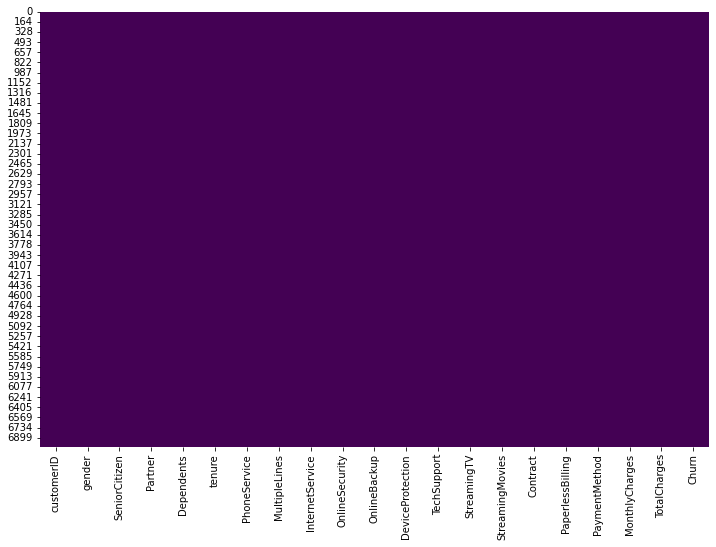

In [11]:
## Dataset Missing Value Illustration
plt.figure(figsize=(12,8)) # Figure canvas size
sns.heatmap(df.isna(), cmap='viridis', cbar=False) # Plot missing value as a heatmap with viridis palette and no legend
plt.xticks(rotation=90) # Rotate x ticks 90 degree
plt.show() # Show the illustration

### Handling Duplicates

We will check wether there are duplicate data or not in the dataset. Ideally, we dont want any duplicates because customerID is a unique number which represent each customer. We might want to drop if there is any duplicate customer ID. The process to identify duplicates is shown below

In [12]:
# Show if there is any duplicate data 
df['customerID'].duplicated().any()

False

From the check above, we know that there is no duplicate data. Therefore, we don't need to handle the duplicates and we can move to next data cleaning process.

### Droping unnecessary features for machine learning

Before we feed our dataset into machine learning model, we need to make sure we don't input unnecessary features into the machine learning model. 

In our dataset there is a feature named 'gender' that shows information about customer gender. We need to drop this feature because it is unethical and we don't want our machine learning to discriminate gender.

In [13]:
# Drop 'gender' feature
df.drop(columns='gender', inplace=True)

Next feature we want to drop from our data is customerID. The reason why we need to drop is because this features is not related at all to Target or Dependent Variable and all of the value is unique. 

In [14]:
# Drop 'customerID' feature
df.drop(columns='customerID', inplace=True)

After we dropped the unnecessary feature, the remaining feature that we will handle further can be seen below.

In [15]:
# Show remaining features
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Handling Outliers

In this part, we want to handle the outliers in the data set. Often outliers are discarded because of their effect on the total distribution and statistical analysis of the dataset. But there are situations where occasional ‘extreme’ events cause an outlier that is outside the usual distribution of the dataset but is a valid measurement and not due to an error. In that case, we will use quick EDA to check and handle outliers.

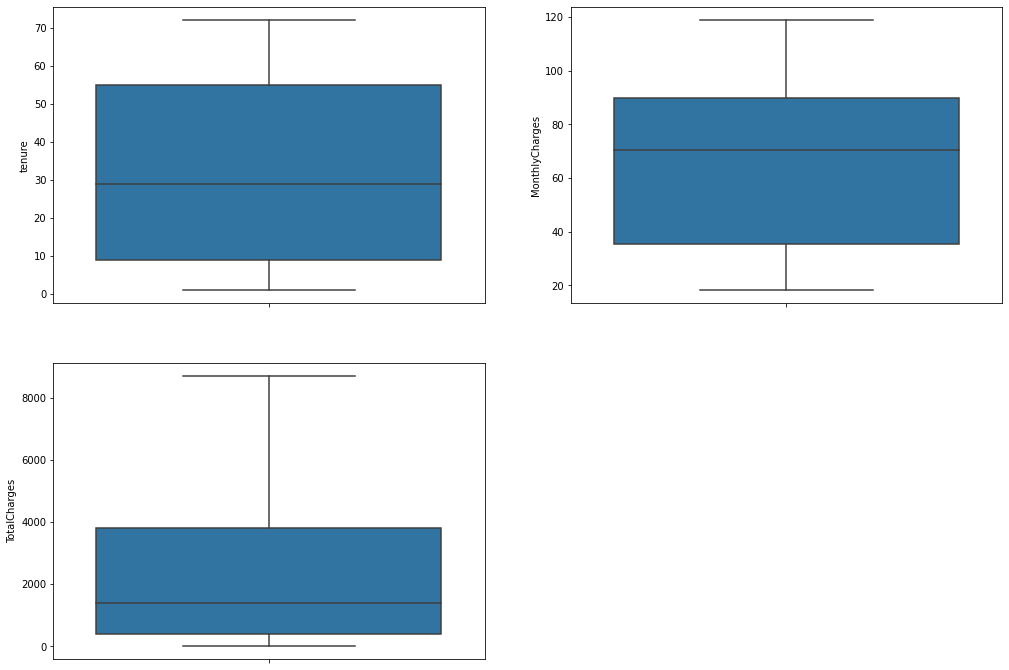

In [16]:
# Create canvas for figure
plt.figure(figsize=(17,12))

# Plot boxplot for tenure feature to show outliers
plt.subplot(221)
sns.boxplot(data=df,y='tenure')

# Plot boxplot for MonthlyCharges feature to show outliers
plt.subplot(222)
sns.boxplot(data=df,y='MonthlyCharges')

# Plot boxplot for TotalCharges feature to show outliers
plt.subplot(223)
sns.boxplot(data=df,y='TotalCharges')
plt.show()

From the graphic above, we could see that three of the numerical features don't have any outliers. Therefore we don't need to handle outliers since there is no any.

### Handling imbalance 

Next we want to check whether our dataset target (in this case 'Churn' column) is imbalance or not. We could say our dataset is imbalance if one class has proportion over 75% (Majority Class) and the other class has proportion below 25% (Minority Class). We should handle the imbalance case because machine learninge will have poor ability to predict data from imbalance dataset (tend to bias to predict Majority Class). We can determine imbalance by calculation below.

In [17]:
# Shows the # of each class
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [18]:
# Shows the proportion of each class
(pd.crosstab(index=df['Churn'],columns='Percentage (%)',normalize=True)*100).round(2)

col_0,Percentage (%)
Churn,
No,73.42
Yes,26.58


The proportion above shows that the dataset is imbalance since one of the target percentage is around 73% (Majority Class), we need to do imbalance handling later if we find that our model have poor ability to predict Minority Class

---

## Feature Selection

To do feature selection in this project we will use quick EDA. In the end, by analysis through quick EDA, we will have conclusion which feature we should drop.
 

### Quick EDA

- SeniorCitizen

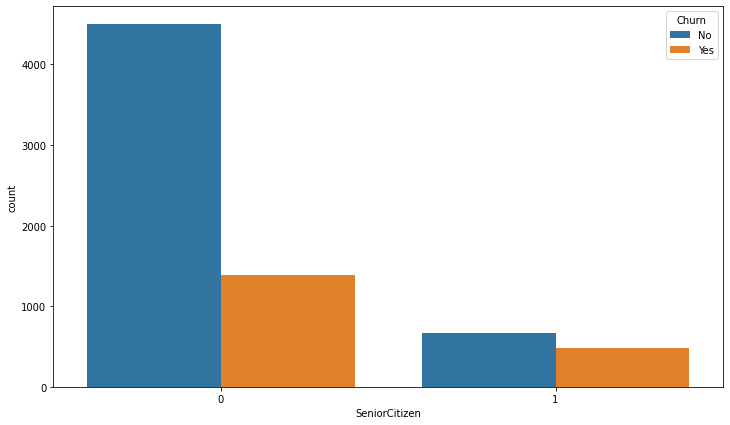

In [19]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.show()

SeniorCitizen have bigger proportion of churn ratio, so we can conclude SeniorCitizen does affect Churn and we will keep the feature. 

- Partner

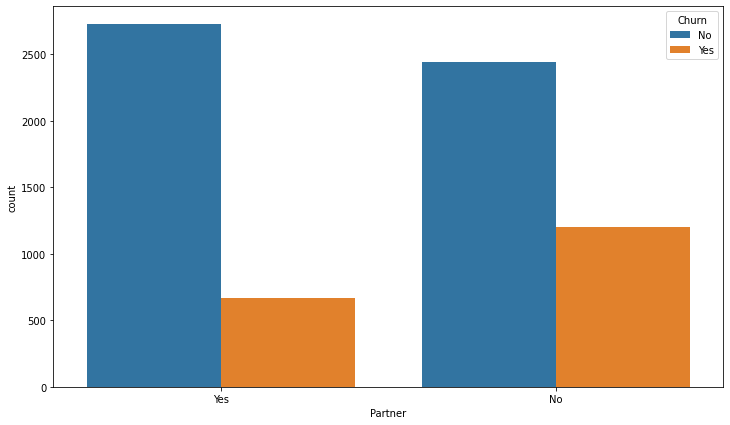

In [20]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='Partner', hue='Churn')
plt.show()

Customer who don't have partner have higher Churn despite the number of non-churn is not quite far, so we can conclude Partner does affect Churn and we will keep the feature. 

- Dependents

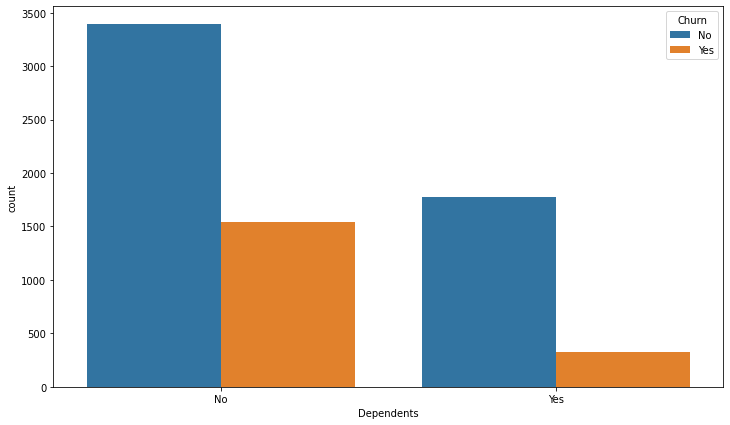

In [21]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='Dependents', hue='Churn')
plt.show()

Customer who have dependents have low Churn, so we can conclude Dependents does affect Churn and we will keep the feature. 

- Tenure

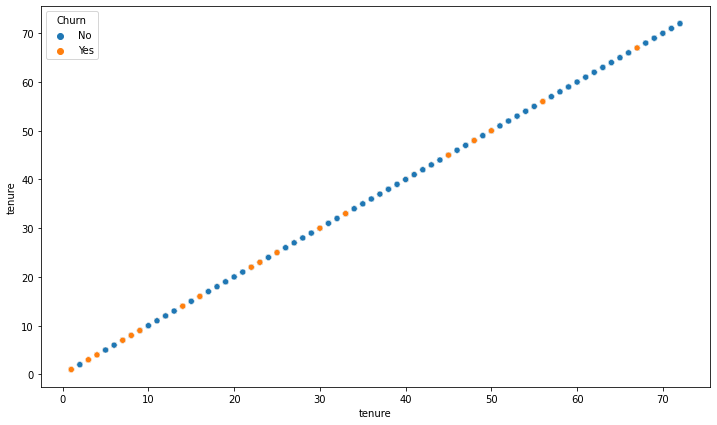

In [22]:
# Plot figure with scatterplot
plt.figure(figsize=(12,7))

sns.scatterplot(data=df, x='tenure', y='tenure', hue='Churn')
plt.show()

Lower tenure customer have are more frequent to be churn than higher tenure customer, so we can conclude tenure does affect Churn and we will keep the feature. 

- PhoneService

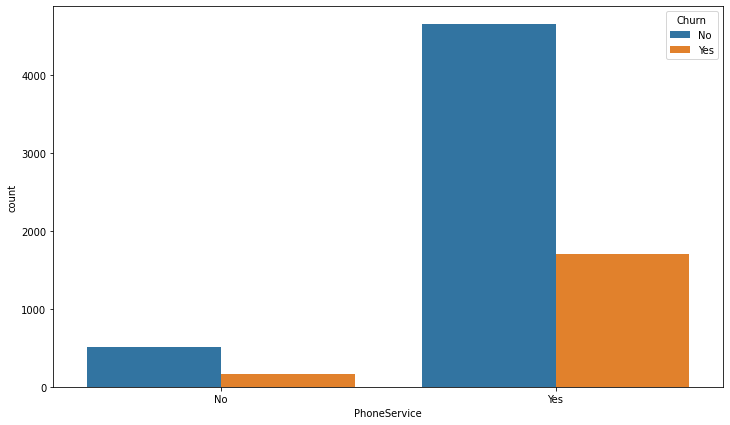

In [23]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='PhoneService', hue='Churn')
plt.show()

We can't infer from the graphic because the number of customer who doesn't use PhoneService is really low compared to the counterpart, we will not use this feature because the number who doesn't use PhoneService is really low. 

- MultipleLines

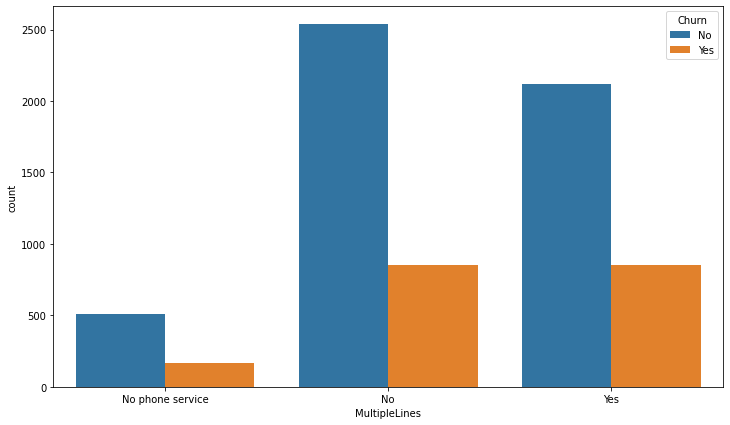

In [24]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='MultipleLines', hue='Churn')
plt.show()

Customer who doesn't use MultipleLines have higher non-churn than the other type. so we can conclude MultipleLines does affect Churn and we will keep the feature.  

- InternetService

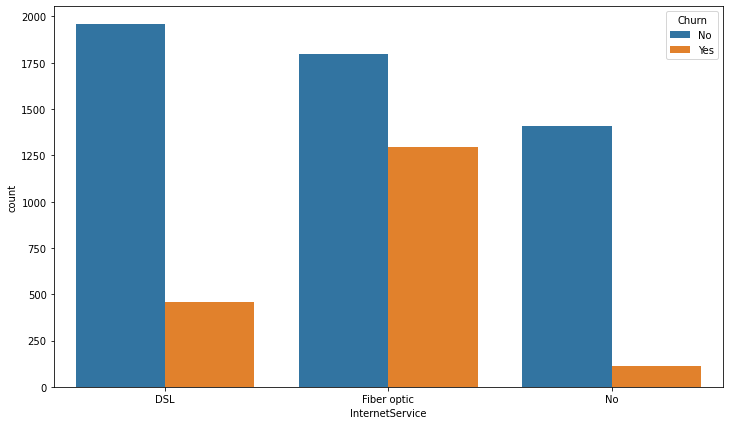

In [25]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='InternetService', hue='Churn')
plt.show()

Customer who use fiber optic have higher churn than the other type. so we can conclude InternetService does affect Churn and we will keep the feature.  

- OnlineSecurity

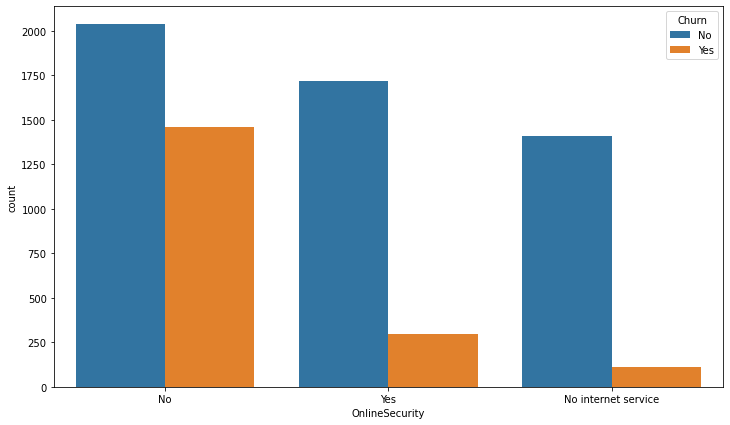

In [26]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='OnlineSecurity', hue='Churn')
plt.show()

Customer who doesn't use online security have higher churn than the other type. so we can conclude online security does affect Churn and we will keep the feature.  

- OnlineBackup

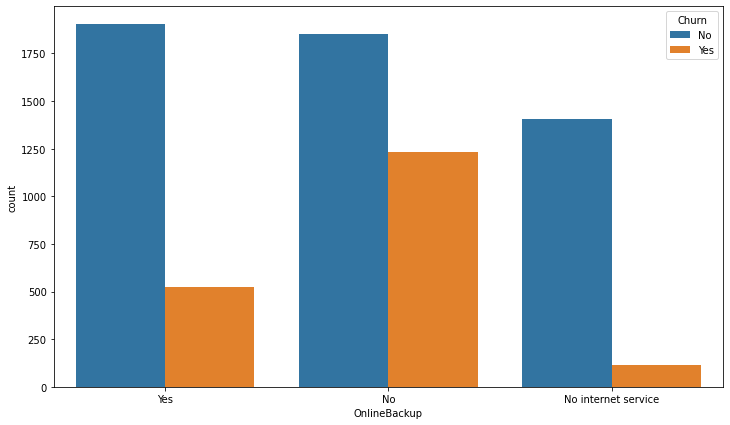

In [27]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='OnlineBackup', hue='Churn')
plt.show()

Customer who doesn't use online backup have higher churn than the other type. so we can conclude online backup does affect Churn and we will keep the feature.  

- DeviceProtection

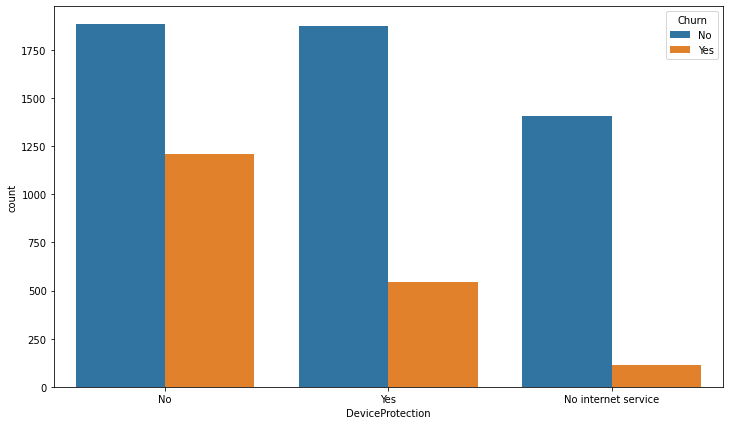

In [28]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='DeviceProtection', hue='Churn')
plt.show()

Customer who doesn't use device protection have higher churn than the other type. so we can conclude device protection does affect Churn and we will keep the feature.  

- TechSupport

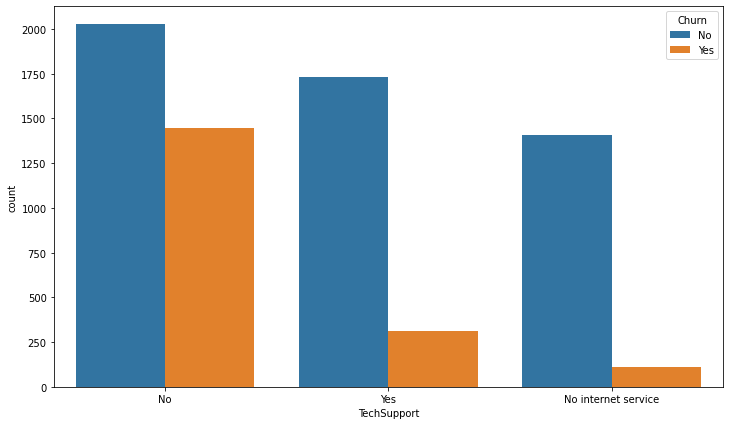

In [29]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.show()

Customer who doesn't use Tech Support have higher churn than the other type. so we can conclude Tech Support does affect Churn and we will keep the feature.  

- StreamingTV

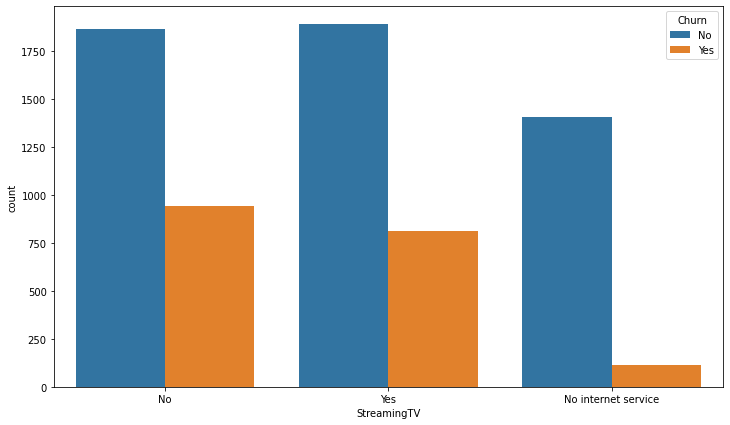

In [30]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='StreamingTV', hue='Churn')
plt.show()

Customer who doesn't use streaming tv have higher churn than the other type. so we can conclude streaming tv does affect Churn and we will keep the feature.  

- StreamingMovies

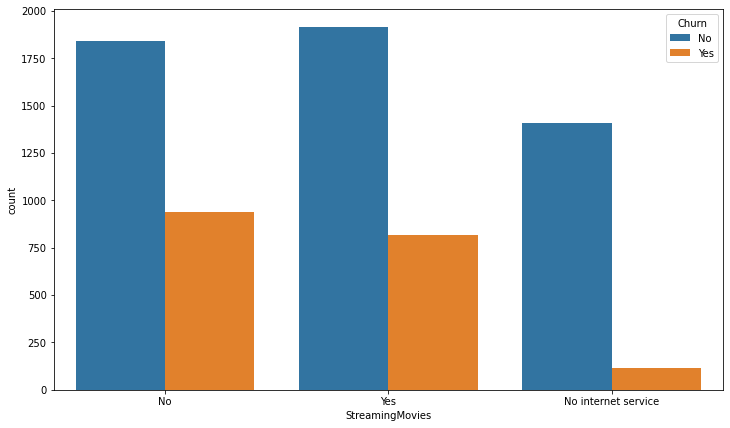

In [31]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='StreamingMovies', hue='Churn')
plt.show()

Customer who doesn't use streaming movies have higher churn than the other type. so we can conclude streaming movies does affect Churn and we will keep the feature.  

- Contract

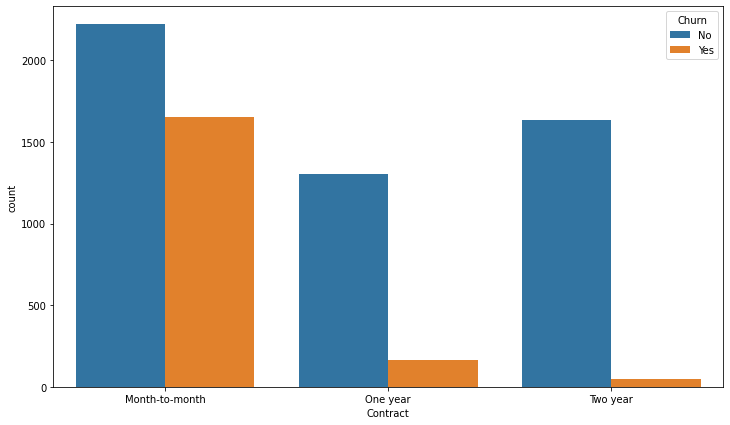

In [32]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='Contract', hue='Churn')
plt.show()

Customer who use month to month contract have higher churn than the other type. so we can conclude Contract does affect Churn and we will keep the feature.  

- PaperlessBilling

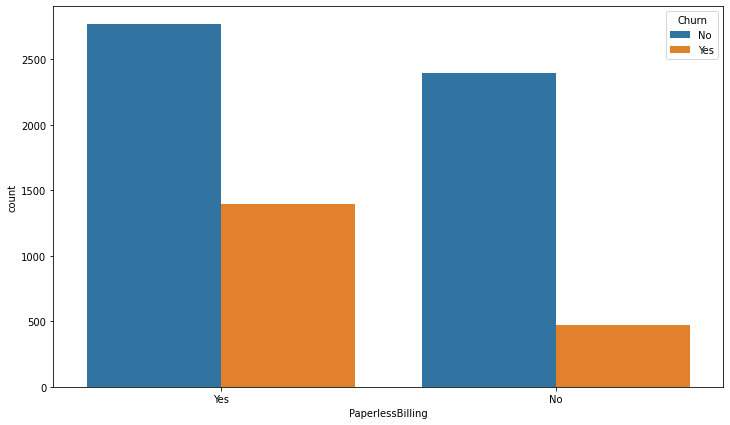

In [33]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='PaperlessBilling', hue='Churn')
plt.show()

Customer who use paperless billing have higher churn than who don't. so we can conclude paperless billing does affect Churn and we will keep the feature.  

- PaymentMethod

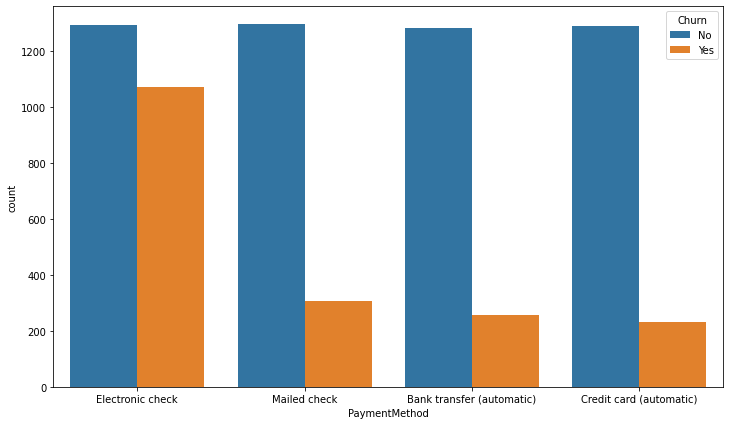

In [34]:
# Plot figure with countplot
plt.figure(figsize=(12,7))

sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.show()

Customer who use electronic check as their payment method have higher churn than the other channel. so we can conclude payment method does affect Churn and we will keep the feature.  

- MonthlyCharges

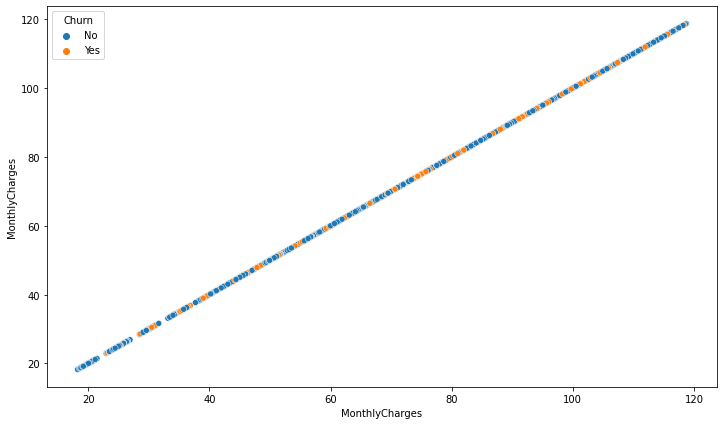

In [35]:
# Plot figure with scatter plot
plt.figure(figsize=(12,7))

sns.scatterplot(data=df, x='MonthlyCharges', y='MonthlyCharges', hue='Churn')
plt.show()

Customer who have higher MonthlyCharges are more frequent to be churn than lower MonthlyCharges, so we can conclude MonthlyCharges does affect Churn and we will keep the feature. 

- TotalCharges

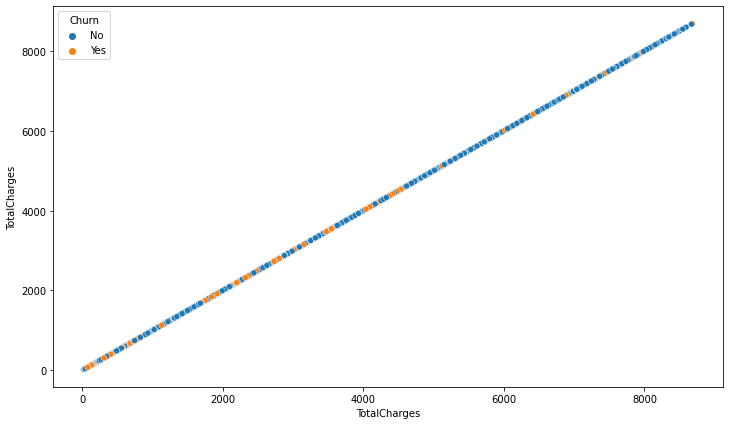

In [36]:
# Plot figure with scatter plot
plt.figure(figsize=(12,7))

sns.scatterplot(data=df, x='TotalCharges', y='TotalCharges', hue='Churn')
plt.show()

Customer who have lower TotalCharges are more frequent to be churn than higher TotalCharges, so we can conclude TotalCharges does affect Churn and we will keep the feature. 

### Select Feature

Based on quick EDA that we have done, there is only one feature that we will drop frome the dataset. The feature that we will drop is `PhoneService`.

In [37]:
# Drop 'PhoneService' Feture
df.drop(columns='PhoneService',inplace=True)
df.head() # Show feature after droping

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---

## Data Preparation

### Data Encoding

For the final step of data preprocessing, we want to do Feature Encoding for each categorical features. What we will do to each categorical features and the justification why we use certain method will be explained below:

1. Change `Partner` feature using OneHotEncoder, because this feature has no order/not ordinal, and also the number of unique data is small.
2. Change `Dependents` feature using OneHotEncoder, because this feature has no order/not ordinal, and also the number of unique data is small.
3. Change `MultipleLines` feature using OneHotEncoder, because this feature has no order/not ordinal, and also the number of unique data is small.
4. Change `InternetService` feature using OneHotEncoder, because this feature has no order/not ordinal, and also the number of unique data is small.
5. Change `OnlineSecurity` feature using OneHotEncoder, because this feature has no order/not ordinal, and also the number of unique data is small.
6. Change `OnlineBackup` feature using OneHotEncoder, because this feature has no order/not ordinal, and also the number of unique data is small.
7. Change `DeviceProtection` feature using OneHotEncoder, because this feature has no order/not ordinal, and also the number of unique data is small.
8. Change `TechSupport` feature using OneHotEncoder, because this feature has no order/not ordinal, and also the number of unique data is small.
9. Change `StreamingTV` feature using OneHotEncoder, because this feature has no order/not ordinal, and also the number of unique data is small.
10. Change `StreamingMovies` feature using OneHotEncoder, because this feature has no order/not ordinal, and also the number of unique data is small.
11. Change `Contract` feature using OneHotEncoder, because this feature has no order/not ordinal, and also the number of unique data is small.
12. Change `PaperlessBilling` feature using OneHotEncoder, because this feature has no order/not ordinal, and also the number of unique data is small.
13. Change `PaymentMethod` feature using OneHotEncoder, because this feature has no order/not ordinal, and also the number of unique data is small.

In [38]:
# Turn target label from string into binary
df['Churn']=df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [39]:
transformer = ColumnTransformer([  ## Column Transfomer function
    ('onehot', OneHotEncoder(drop='first'), ['Partner','Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']) # List of columns we want to encode with OHE
], remainder='passthrough') # all columns not specified in the list will be passed through without transformation

### Splitting Data

In [40]:
x = df.drop(columns=['Churn']) # Define Feature
y = df['Churn'] # Define Target

In [41]:
# Splitting data into train and test with test size 20%
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=29)

In [42]:
# Check if our ColumnTransformer work as intended
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names())
testing.head()

,onehot__x0_Yes,onehot__x1_Yes,onehot__x2_No phone service,onehot__x2_Yes,onehot__x3_Fiber optic,onehot__x3_No,onehot__x4_No internet service,onehot__x4_Yes,onehot__x5_No internet service,onehot__x5_Yes,...,onehot__x10_One year,onehot__x10_Two year,onehot__x11_Yes,onehot__x12_Credit card (automatic),onehot__x12_Electronic check,onehot__x12_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,19.90,533.50
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,45.0,86.10,3861.45
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,48.95,48.95
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8.0,60.00,487.75
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0,34.70,383.55


---

## Machine Learning Model

In this project we will use six different algoritm as a base model. We will use Logistic Regression, KNN, SVC, Decision Tree, XGBoost. The reason we use those models as a base model because we need to do classification and those models are the most common and reliable model to be used for classification.

We need to prepare each of the model into a variabel

In [43]:
# Define each model that we use to variable
logreg=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
xgb=XGBClassifier()

Next we want to do benchmarking with crossvalidation so we get a reliable evalution metric for every base model, the result will be used as considertion to select base model that we want to tune.

**Model Benchmarking using cross validation for training set**

In [44]:
models = [logreg,knn,dt,rf,xgb] # Create a list of model we are going to use
score=[] # Empty list to store score result
rata=[] # Empty list to store mean score result
std=[] # Empty list to store stdev result

for i in models:
    skfold=StratifiedKFold(n_splits=5) # Define how many fold we want to use
    estimator=Pipeline([ # Define the pipeline
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='recall') # Run the crossvalidation and store it to a variable
    score.append(model_cv) # Store score to score list
    rata.append(model_cv.mean()) # Store score average to rata list
    std.append(model_cv.std()) # store Stdev to std lis
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False) # Create a dataframe to summarize result

,mean recall,sdev
model,,
Logistic Regression,0.535117,0.019271
XGBoost,0.517057,0.018990
Decision Tree,0.505686,0.017366
Random Forest,0.489632,0.030623
KNN,0.431438,0.025295


**Model Benchmarking using cross validation for test set**

In [45]:
models = [logreg,knn,dt,rf,xgb] # Create a list of model we are going to use
score=[] # Empty list to store score result
rata=[] # Empty list to store mean score result
std=[] # Empty list to store stdev result

for i in models:
    skfold=StratifiedKFold(n_splits=5) # Define how many fold we want to use
    estimator=Pipeline([ # Define the pipeline
        ('preprocess',transformer),
        ('model',i)])        
    model_cv=cross_val_score(estimator,x_test,y_test,cv=skfold,scoring='recall') # Run the crossvalidation and store it to a variable
    score.append(model_cv) # Store score to score list
    rata.append(model_cv.mean()) # Store score average to rata list
    std.append(model_cv.std()) # store Stdev to std lis
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False) # Create a dataframe to summarize result

,mean recall,sdev
model,,
Decision Tree,0.540216,0.030691
Logistic Regression,0.535135,0.072511
Random Forest,0.497514,0.047891
XGBoost,0.462811,0.052166
KNN,0.417225,0.032410


From model benchmarking above, all of the model perform relatively low. Before we choose the best base model, we want to try whether handling imbalance could improve the base model score. We will try to handle it using RandomOverSample and SMOTE

**SMOTE for Train Set**

In [46]:
models = [logreg,knn,dt,rf,xgb] # Create a list of model we are going to use
score=[]  # Empty list to store score result
rata=[] # Empty list to store mean score result
std=[] # Empty list to store stdev result

for i in models:
    skfold=StratifiedKFold(n_splits=5) # Define how many fold we want to use
    estimator=Pipeline([ # Define the pipeline
        ('preprocess',transformer),
        ('balancing',SMOTE()), # Insert SMOTE to pipeline
        ('model',i)])        
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='recall')  # Run the crossvalidation and store it to a variable
    score.append(model_cv) # Store score to score list
    rata.append(model_cv.mean()) # Store score average to rata list
    std.append(model_cv.std()) # store Stdev to std lis
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False) # Create a dataframe to summarize result

,mean recall,sdev
model,,
Logistic Regression,0.772575,0.007327
KNN,0.637458,0.026130
XGBoost,0.534448,0.015457
Decision Tree,0.519732,0.036735
Random Forest,0.513712,0.018023


**SMOTE for Test Set**

In [47]:
models = [logreg,knn,dt,rf,xgb] # Create a list of model we are going to use
score=[] # Empty list to store score result
rata=[]  # Empty list to store mean score result
std=[] # Empty list to store stdev result

for i in models:
    skfold=StratifiedKFold(n_splits=5) # Define how many fold we want to use
    estimator=Pipeline([ # Define the pipeline
        ('preprocess',transformer),
        ('balancing',SMOTE()), # Insert SMOTE to pipeline
        ('model',i)])        
    model_cv=cross_val_score(estimator,x_test,y_test,cv=skfold,scoring='recall') # Run the crossvalidation and store it to a variable
    score.append(model_cv) # Store score to score list
    rata.append(model_cv.mean()) # Store score average to rata list
    std.append(model_cv.std()) # store Stdev to std lis
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False) # Create a dataframe to summarize result

,mean recall,sdev
model,,
Logistic Regression,0.772865,0.030765
KNN,0.644613,0.056471
Random Forest,0.540216,0.021075
XGBoost,0.510955,0.049662
Decision Tree,0.486631,0.065591


As we can see, we see improvement in recall score after imbalance handling using SMOTE. Let's try RandomOverSampling next.

**RandomOverSampler for Train Set**

In [48]:
models = [logreg,knn,dt,rf,xgb] # Create a list of model we are going to use
score=[] # Empty list to store score result
rata=[] # Empty list to store mean score result
std=[] # Empty list to store stdev result

for i in models:
    skfold=StratifiedKFold(n_splits=5) # Define how many fold we want to use
    estimator=Pipeline([ # Define the pipeline
        ('preprocess',transformer),
        ('balancing',RandomOverSampler()), # Insert RandomOverSampler to pipeline
        ('model',i)])        
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='recall') # Run the crossvalidation and store it to a variable
    score.append(model_cv) # Store score to score list
    rata.append(model_cv.mean()) # Store score average to rata list
    std.append(model_cv.std()) # store Stdev to std lis
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False) # Create a dataframe to summarize result

,mean recall,sdev
model,,
Logistic Regression,0.772575,0.005983
XGBoost,0.654181,0.023706
KNN,0.649498,0.023875
Random Forest,0.576589,0.017001
Decision Tree,0.496990,0.028972


**RandomOverSampler for Test Set**

In [49]:
models = [logreg,knn,dt,rf,xgb] # Create a list of model we are going to use
score=[] # Empty list to store score result
rata=[] # Empty list to store mean score result
std=[] # Empty list to store stdev result

for i in models:
    skfold=StratifiedKFold(n_splits=5) # Define how many fold we want to use
    estimator=Pipeline([ # Define the pipeline
        ('preprocess',transformer),
        ('balancing',RandomOverSampler()), # Insert RandomOverSampler to pipeline
        ('model',i)])        
    model_cv=cross_val_score(estimator,x_test,y_test,cv=skfold,scoring='recall') # Run the crossvalidation and store it to a variable
    score.append(model_cv) # Store score to score list
    rata.append(model_cv.mean()) # Store score average to rata list
    std.append(model_cv.std()) # store Stdev to std lis
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False) # Create a dataframe to summarize result

,mean recall,sdev
model,,
Logistic Regression,0.770234,0.041797
KNN,0.644432,0.049964
Random Forest,0.558991,0.046315
XGBoost,0.553550,0.032293
Decision Tree,0.516216,0.045640


There is no much difference between RandomOverSampler and SMOTE if we look at the recall score from each model. Logistic Regression has the highest recall score but if we want to do hyperparameter tuning to achieve better score, we have to look for another alternative. In this case, the promising base model we can choose is XGBoost, even though the model is overfit (recall score in train test is higher than test set), we still could search for optimum hyperparameter to reduce overfitting. Let's move to Hyperparameter Tuning  

### What is XGBoost and how does it works?

Before we dive into tuning our XGBoost model, we need to know the concept of our XGBoost model. 

XGBoost, which stands for Extreme Gradient Boosting, provides parallel tree boosting. The term “gradient boosting” comes from the idea of “boosting” or improving a single weak model by combining it with a number of other weak models in order to generate a collectively strong model. Gradient boosting sets targeted outcomes for the next model in an effort to minimize errors. Targeted outcomes for each case are based on the gradient of the error (hence the name gradient boosting)

Graphic below shows great representation on how XGBoost works

![](Images/1_7EhjRtzxSj5whkHf-MxjLA.jpg)

### Hyperparameter Tuning

For hyperparameter tuning, we will utilize randomized search to find optimum hyperparameter . We will also use Random overSampler to handle imbalance since it performs slightly better.

In [50]:
max_depth = list(np.arange(1, 11))
learning_rate = list(np.arange(1, 100)/100)
n_estimators = list(np.arange(100, 201))
subsample = list(np.arange(2, 10)/10)
gamma = list(np.arange(1, 11)) 
colsample_bytree = list(np.arange(1, 10)/10)
reg_alpha = list(np.logspace(-3, 1, 10)) 

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [51]:
# Define pipeline that we will use for randomized search
estimator_xgb = Pipeline([ # Define the pipeline
        ('preprocess', transformer),
        ('balancing',RandomOverSampler()), # Insert RandomOverSampler to pipeline
        ('model', xgb)
        ])

skfold = StratifiedKFold(n_splits=5)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = skfold, 
    scoring = ['recall'], 
    n_jobs = -1,
    refit = 'recall', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42 
)
random_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Partner',
                                                                                'Dependents',
                                                                                'MultipleLines',
                                                                                'InternetService',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'StreamingT...
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...],
                                        'model__reg_alpha': [0.001,
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, refit='recall', scoring=['recall'])

In [52]:
print(random_xgb.best_score_)
print(random_xgb.best_params_)

0.8066889632107024
{'model__subsample': 0.5, 'model__reg_alpha': 10.0, 'model__n_estimators': 188, 'model__max_depth': 1, 'model__learning_rate': 0.13, 'model__gamma': 2, 'model__colsample_bytree': 0.8}


From the RandomizedSearchCV that we have done, we got the best hyperparameter fro XGBoost and we could achieve 0.81 recall score on train set. We already know that in base model, we got 0.54 recall score on test set using XGBoost with RandomOverSampling. Let's try to compare the performance of XGBoost Model between Base and Tuned with RandomOverSampling on Test Set

In [53]:
# Prepare xgb_tuned
xgb_tuned = random_xgb.best_estimator_
xgb_tuned.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Partner', 'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('balancing', RandomO...
                               gamma=2, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.13, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=1, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=188, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=10.0,
                               reg_lambda=1, ...))])

In [54]:
# Prepare xgb_base
xgb_base=estimator_xgb
xgb_base.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Partner', 'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('balancing', RandomO...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [55]:
## Predict the test data with default and tuned model

y_pred_base = xgb_base.predict(x_test)
y_pred_proba_base = xgb_base.predict_proba(x_test)
y_pred_tuned = xgb_tuned.predict(x_test)
y_pred_proba_tuned = xgb_tuned.predict_proba(x_test)

In [56]:
## Create classification report with default and tuned model

report_base = classification_report(y_test, y_pred_base)
report_tuned = classification_report(y_test, y_pred_tuned)

In [57]:
## Create confusion matrix with default and tuned model

cm_base = confusion_matrix(y_test, y_pred_base)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

In [58]:
## Display the classification report

print('Classification Report Base XGBoost with RandomOverSampling : \n', report_base)
print('Classification Report Tuned XGBoost with RandomOverSampling : \n', report_tuned)

Classification Report Base XGBoost with RandomOverSampling : 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.54      0.65      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.77      1407

Classification Report Tuned XGBoost with RandomOverSampling : 
               precision    recall  f1-score   support

           0       0.92      0.73      0.81      1033
           1       0.52      0.83      0.64       374

    accuracy                           0.75      1407
   macro avg       0.72      0.78      0.73      1407
weighted avg       0.82      0.75      0.77      1407



In [59]:
## Display the XGBoost Base confusion matrix

print('Confusion Matrix Base XGBoost with RandomOverSampling :')
cm_base_ts = confusion_matrix(y_test, y_pred_base, labels=[1,0])
df_base_ts = pd.DataFrame(data = cm_base_ts, columns=['Pred 1', 'Pred 0'], index=['Act 1', 'Act 0'])
df_base_ts


Confusion Matrix Base XGBoost with RandomOverSampling :


,Pred 1,Pred 0
Act 1,243,131
Act 0,203,830


In [60]:
## Display the XGBoost Tuned confusion matrix

print('Confusion Matrix Report Tuned XGBoost with RandomOverSampling :')
cm_tuned_ts = confusion_matrix(y_test, y_pred_tuned, labels=[1,0])
df_tuned_ts = pd.DataFrame(data = cm_tuned_ts, columns=['Pred 1', 'Pred 0'], index=['Act 1', 'Act 0'])
df_tuned_ts

Confusion Matrix Report Tuned XGBoost with RandomOverSampling :


,Pred 1,Pred 0
Act 1,312,62
Act 0,284,749


## Conclusion & Recommendation

In [61]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.92      0.73      0.81      1033
           1       0.52      0.83      0.64       374

    accuracy                           0.75      1407
   macro avg       0.72      0.78      0.73      1407
weighted avg       0.82      0.75      0.77      1407



Based on the results of the classification report from our model, we can conclude that if we use our model in the future to predict customer that will be churn in the next billing cycle, then our model can get 85% of customer who will churn in the next month that we approach and our model can reduce 69% effort to approach customer who in reality is not churn (all this based on the recall)

If we calculate the cost to approach a customer by using Customer Retention Cost, which is according to     

Let's say we have sample of 10000 customers that we are going to approach where 2500 is churn and 7500 is not churn (25% churn rate), then we can calculate

Without Model (all of the customer will approached)
- Human resource cost =>
    1 telemarketing person can reach upto 35 calls a day where they will offer some promotion, so in a month they can reach up to 700. We need 15 telmarketing to cover all of the customer. So the cost would be (asuming telemarketer salary is $3600 using salary data  [[4]](https://www.indeed.com/career/telemarketer/salaries))

    $3500 * 15 = $52500 per month
    or around $5.25 per customer


- Revenue decrease due to customer churn (we will use average monthlyPlan of $40 from dataset as a base), since we targeted all of the customer we assume our promotion has 60% effectiveness to prevent churn [[5]](https://www.servicebell.com/post/cold-calling-statistics). Then total number of customer that will churn would be

    2500 * 0.4 = 1000 customer who will churn despite being approached
    $40 * 1000 = $40,000

- Total cost to company =>
    
    $52,500 + $40,000 = $92,500 per month


With Model 

- Human resource cost =>

    We already know that the cost of telemarketing per customer is $5.25. By using machine learning model, we only limit our approach to 2500 customer who has the biggest churn probability according to model. The human resource cost would be 

    $5.25 * 2500 = $13125

- Revenue decrease due to customer churn (we will use average monthlyPlan of $40 as a base),   since we targeted all of the customer we assume our promotion has 60% effectiveness to prevent churn. Then total number of customer that will churn would be.

    2500 * 0.85 = 2125 customer who will churn

    2125 * 0.4 = 850 customer who will churn despite being approached

    $40 * 850 = $34,000 per month

- Total cost to company =>

    $13,125 + $34,000 = $47,125 per month

According to calculation above, cost saving that could be achieve if we applied machine learning model is

    $92,500 - $47,125 = $45,375 per month
    
The cost saving will keep growing if X Telco Company have positive customer grow ! But will it cover the cost of utilizing machine learning? Utilizing machine learning mean we should hire a machine learning team, the cost would be (using salary data [[6]](https://www.indeed.com/career/machine-learning-engineer/salaries) and consist of 3 people team)

    3 * $8,738 = $26,214 per month
    $45,375 - $26,214 = $19,161 cost saving per month

The answer is yes, the cost saving generated could cover the cost of utilizing machine learning

### Implementation Recommendation

This Machine Learning will be used by `Costumer Solution Division` as a base to determine which customer they will focus to approach each month to prevent them churn in the next billing cycle. The Machine Learning model should be used every billing cycle ends (first date of each month). 

### Project Limitation

Since X Telco Company is based on US, and the data we will use is customer data from there, the model that will be developed might not be suitable to be applicated in other region outside US due to different characteristic of the customer and promotional preferences.    

This machine learning model also used data that based on X Telco Company services plan and price, so it might not be suitable for other company that offers different services plan and price

### Future Recommendation

We list our recommendation to improve this machine learning performance in the future:
- There should be feature that contains information about number of technical issue faced by customer each month, number of complains each customer made each month could benefitted the machine learning model since it has relation with customer satisfactory
- Explore other model and hyperparameter to further improve the machine learning model
- Train the machine learning model with the updated data regulary

## **Save Model**

In [62]:
## Import package
import pickle

In [63]:
## Export Model with Write Binary (wb)
pickle.dump(xgb_tuned, open('TelcoChurn_ModelXGB_v.1.0.pkl', 'wb') )